# (K) Nearest Neighbours

https://scikit-activeml.github.io/scikit-activeml-docs/generated/api/skactiveml.visualization.plot_decision_boundary.html
https://github.com/scikit-activeml/scikit-activeml
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
http://localhost:8888/notebooks/OneDrive/AY2022%20Y3S2%20Exchange/Machine%20Learning%201/Practicals/Practical%206/P6.ipynb

## Importing packages and loading necessary datasets

In [11]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from shapely.geometry import Point
from sklearn.model_selection import train_test_split, GridSearchCV
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error
import plotting
import skactiveml.visualization as skactive
from skactiveml.visualization import plot_decision_boundary

In [3]:
crimes_df = pd.read_csv("crimes_processed.csv")
meuse_df = pd.read_csv("meuse_processed.csv")

In [13]:
meuse_df

x       y   cadmium    copper      lead      zinc   elev      dist  \
0    181072  333611  2.459589  4.442651  5.700444  6.929517  7.909  0.001358   
1    181025  333558  2.151762  4.394449  5.624018  7.039660  6.983  0.012224   
2    181165  333537  1.871802  4.219508  5.293305  6.461468  7.800  0.103029   
3    181298  333484  0.955511  4.394449  4.753590  5.549076  7.655  0.190094   
4    181307  333330  1.029619  3.871201  4.762174  5.594711  7.480  0.277090   
..      ...     ...       ...       ...       ...       ...    ...       ...   
150  179184  330182 -0.223144  2.995732  3.891820  5.111988  8.128  0.423837   
151  179085  330292  1.131402  3.663562  5.153292  6.206576  8.577  0.423837   
152  178875  330311  0.741937  3.433987  4.779123  5.834811  8.429  0.277090   
153  179466  330381 -0.223144  3.044522  3.931826  5.087596  9.406  0.358606   
154  180627  330190  0.993252  3.295837  4.820282  5.926926  8.261  0.012224   

       om  ffreq  soil  lime landuse  dist.m  
0    13.6      1     1     1      Ah      50  
1    14.0      1     1     1      Ah      30  
2    13.0      1     1     1      Ah     150  
3     8.0      1     2     0      Ga     270  
4     8.7      1     2     0      Ah     380  
..    ...    ...   ...   ...     ...     ...  
150   4.7      3     1     0      Am     540  
151   9.1      3     1     0      Ah     520  
152   6.5      3     1     0      Ah     350  
153   5.7      3     1     0       W     460  
154   5.5      3     3     0       W      40  

[155 rows x 14 columns]

In [14]:
crimes_df

Latitude  Longitude  n  location_id
0      41.644590 -87.615880  1            1
1      41.647037 -87.616647  1            2
2      41.647039 -87.616098  2            3
3      41.647180 -87.544241  1            4
4      41.647716 -87.542811  1            5
...          ...        ... ..          ...
25449  42.022526 -87.672401  1        25450
25450  42.022529 -87.666324  1        25451
25451  42.022535 -87.673398  2        25452
25452  42.022536 -87.673711  1        25453
25453  42.022548 -87.676139  1        25454

[25454 rows x 4 columns]

# Meuse Dataset

## Splitting Data

In [15]:
# Convert columns to numpy arrays
observed_location_columns_meuse = ['x', 'y']
observed_values_column_meuse = 'zinc'
observed_locations_meuse = meuse_df[observed_location_columns_meuse].values
observed_values_meuse = meuse_df[observed_values_column_meuse].values

In [16]:
X_train_meuse, X_test_meuse, y_train_meuse, y_test_meuse = train_test_split(observed_locations_meuse,
                                                                            observed_values_meuse, test_size=0.2, random_state=0)
print(f"X_train_meuse.shape: {X_train_meuse.shape}")
print(f"X_test_meuse.shape:  {X_test_meuse.shape}")
print(f"y_train_meuse.shape: {y_train_meuse.shape}")
print(f"y_test_meuse.shape:  {y_test_meuse.shape}")

X_train_meuse.shape: (124, 2)
X_test_meuse.shape:  (31, 2)
y_train_meuse.shape: (124,)
y_test_meuse.shape:  (31,)


## K-Fold Cross Validation

https://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out-loo (Reason why K-Fold preferred)

In [54]:
# Define the range of n_neighbors to test
neighbors_range = np.arange(1, 20)
nn_model = KNeighborsRegressor()
parameters = [
    {'n_neighbors': neighbors_range}
]

scoring_methods = ['neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

clf = GridSearchCV(cv=5, estimator = nn_model, param_grid = parameters, return_train_score=True, scoring= scoring_methods, refit = 'neg_mean_absolute_percentage_error')

start_time = time.time()
clf.fit(X_train_meuse, y_train_meuse)

end_time = time.time()

print(f"Computation Time: {end_time - start_time:.2f} seconds")

Computation Time: 0.22 seconds


## Hyperparameter selection

In [65]:
print(f"Dataset: {clf.best_params_}")
print(f"Mean Cross-Validated Score of Best Estimator: {-clf.best_score_}")
print(clf.cv_results_['params'][clf.best_index_])
print("Training scores for each metric for each value of neighbors")
print(clf.cv_results_['mean_train_neg_mean_absolute_percentage_error'])
print(clf.cv_results_['mean_train_neg_root_mean_squared_error'])
print(clf.cv_results_['mean_train_neg_mean_absolute_error'])

Dataset: {'n_neighbors': 5}
Mean Cross-Validated Score of Best Estimator: 0.07434631623401346
{'n_neighbors': 5}
Training scores for each metric for each value of neighbors
[ 0.         -0.03652205 -0.04452766 -0.05011728 -0.0546583  -0.05733235
 -0.06040694 -0.06265526 -0.06500359 -0.06810879 -0.07050175 -0.07312325
 -0.07549982 -0.07779381 -0.0802411  -0.08187928 -0.08284503 -0.0844836
 -0.08605109]
[ 0.         -0.28910722 -0.34776254 -0.38301653 -0.4239708  -0.44091431
 -0.46263249 -0.47702927 -0.49600153 -0.51202422 -0.527437   -0.53898145
 -0.54987983 -0.56202893 -0.57611882 -0.5864891  -0.58968013 -0.59842897
 -0.60670952]
[ 0.         -0.21664863 -0.26319775 -0.29816279 -0.32677075 -0.34285981
 -0.36032019 -0.37372916 -0.38792362 -0.40648601 -0.42139079 -0.43607818
 -0.45000727 -0.46301607 -0.47761307 -0.48738133 -0.49272778 -0.50231815
 -0.51169871]


## Evaluation of Model (Testing Chosen model)

### Performance Metrics of Model

Test Score: 0.04842387264512845


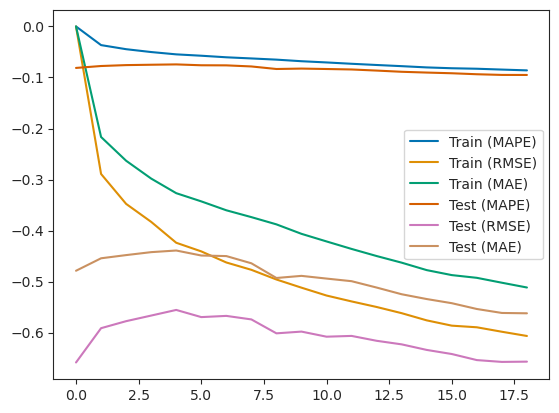

In [63]:
test_score = clf.score(X_test_meuse, y_test_meuse)
print(f"Test Score: {-test_score}")

plt.figure()
plt.plot(clf.cv_results_['mean_train_neg_mean_absolute_percentage_error'], label="Train (MAPE)")
plt.plot(clf.cv_results_['mean_train_neg_root_mean_squared_error'], label="Train (RMSE)")
plt.plot(clf.cv_results_['mean_train_neg_mean_absolute_error'], label="Train (MAE)")
plt.plot(clf.cv_results_['mean_test_neg_mean_absolute_percentage_error'], label="Test (MAPE)")
plt.plot(clf.cv_results_['mean_test_neg_root_mean_squared_error'], label="Test (RMSE)")
plt.plot(clf.cv_results_['mean_test_neg_mean_absolute_error'], label="Test (MAE)")
plt.legend()
plt.show()

### Plotting Spatial Interpolation of entire area with Model

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor (Kneighbors package used)

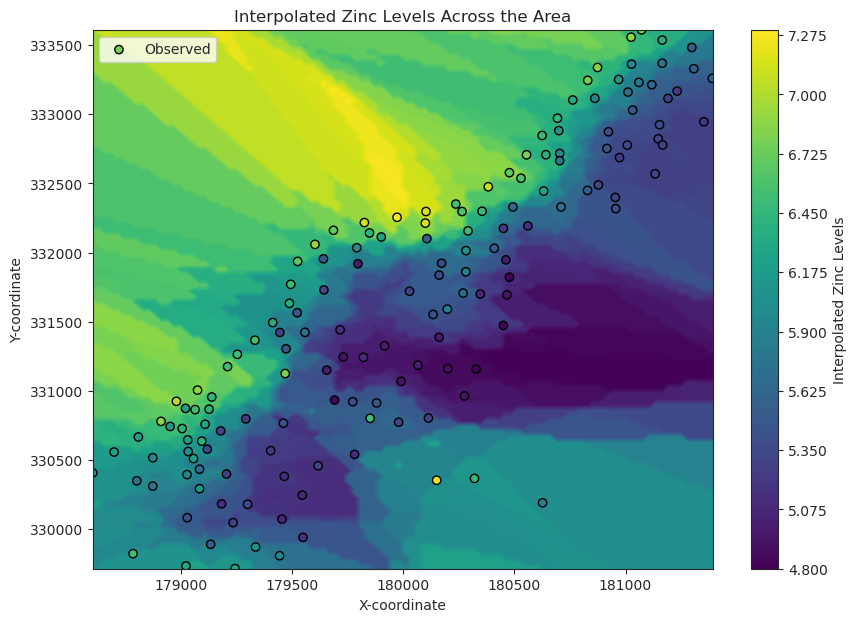

Spatial Interpolation Computation Time: 0.01 seconds


In [75]:
# Using full set: Convert columns to numpy arrays
observed_location_columns = ['x', 'y']
observed_values_column = 'zinc'
observed_locations = meuse_df[observed_location_columns].values
observed_values = meuse_df[observed_values_column].values

# Hyperparamter tuned: Number of nearest neighbors to consider
n_neighbors = 5

# Initialize NearestNeighbors model
nn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations,observed_values)  # Re-fit model using all data
x_min, x_max = observed_locations[:, 0].min() - 1, observed_locations[:, 0].max() + 1
y_min, y_max = observed_locations[:, 1].min() - 1, observed_locations[:, 1].max() + 1
x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(10, 7))
plt.contourf(x_grid, y_grid, z_grid, cmap='viridis', levels=100)
plt.colorbar(label='Interpolated Zinc Levels')
plt.scatter(meuse_df['x'], meuse_df['y'], c=meuse_df['zinc'], cmap='viridis', edgecolor='k', label='Observed')
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.legend()
plt.title('Interpolated Zinc Levels Across the Area')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")

# Crimes Dataset

## Splitting Data

In [76]:
# Convert columns to numpy arrays
observed_location_columns_crimes = ['Latitude', 'Longitude']
observed_values_column_crimes = 'n'
observed_locations_crimes = crimes_df[observed_location_columns_crimes].values
observed_values_crimes = crimes_df[observed_values_column_crimes].values

In [77]:
X_train_crimes, X_test_crimes, y_train_crimes, y_test_crimes = train_test_split(observed_locations_crimes,
                                                                            observed_values_crimes, test_size=0.2, random_state=0)
print(f"X_train_crimes.shape: {X_train_crimes.shape}")
print(f"X_test_crimes.shape:  {X_test_crimes.shape}")
print(f"y_train_crimes.shape: {y_train_crimes.shape}")
print(f"y_test_crimes.shape:  {y_test_crimes.shape}")

X_train_crimes.shape: (20363, 2)
X_test_crimes.shape:  (5091, 2)
y_train_crimes.shape: (20363,)
y_test_crimes.shape:  (5091,)


## K-Fold Cross Validation

In [82]:
# Define the range of n_neighbors to test
neighbors_range = range(160, 1600, 160)
nn_model = KNeighborsRegressor()
parameters = [
    {'n_neighbors': neighbors_range}
]

scoring_methods = ['neg_mean_absolute_percentage_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error']

clf = GridSearchCV(cv=5, estimator = nn_model, param_grid = parameters, return_train_score=True, scoring= scoring_methods, refit = 'neg_mean_absolute_percentage_error')

start_time = time.time()
clf.fit(X_train_crimes, y_train_crimes)

end_time = time.time()

print(f"Computation Time: {end_time - start_time:.2f} seconds")

KeyboardInterrupt: 

## Hyperparameter selection

In [79]:
print(f"Dataset: {clf.best_params_}")
print(f"Mean Cross-Validated Score of Best Estimator: {-clf.best_score_}")
print(clf.cv_results_['params'][clf.best_index_])
print("Training scores for each metric for each value of neighbors")
print(clf.cv_results_['mean_train_neg_mean_absolute_percentage_error'])
print(clf.cv_results_['mean_train_neg_root_mean_squared_error'])
print(clf.cv_results_['mean_train_neg_mean_absolute_error'])

Dataset: {'n_neighbors': 2}
Mean Cross-Validated Score of Best Estimator: 0.2332335773077859
{'n_neighbors': 2}
Training scores for each metric for each value of neighbors
[ 0.         -0.11964069 -0.15640934 -0.1772089  -0.18982923 -0.19801664
 -0.20336147 -0.20714384 -0.21028476 -0.21266122 -0.21414476 -0.2157688
 -0.2172274  -0.21808593 -0.21898571 -0.21975541 -0.22025026 -0.22093664
 -0.22171833]
[ 0.         -0.59441147 -0.69921493 -0.7481893  -0.77650422 -0.79360676
 -0.80606965 -0.81513535 -0.82340812 -0.82873695 -0.83235652 -0.83518579
 -0.83756994 -0.84037232 -0.84299736 -0.84565011 -0.84769329 -0.84997593
 -0.85181182]
[ 0.         -0.18779768 -0.24371405 -0.27362124 -0.29163922 -0.30354686
 -0.31154191 -0.31722054 -0.32199464 -0.32554507 -0.32791534 -0.33031208
 -0.33244019 -0.33392669 -0.33544251 -0.33673125 -0.33768639 -0.33877957
 -0.33996381]


## Evaluation of Model (Testing Chosen model)

### Performance Metrics of Model

Test Score: 0.24471678753822268


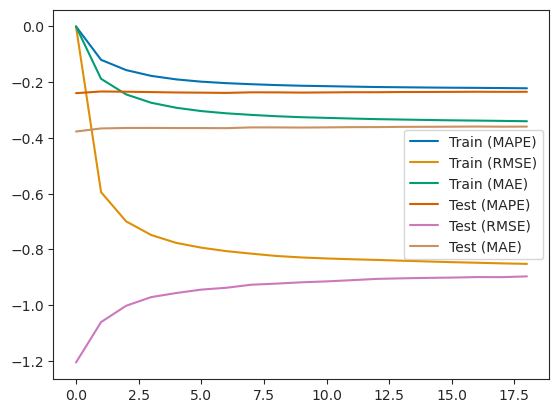

In [80]:
test_score = clf.score(X_test_crimes, y_test_crimes)
print(f"Test Score: {-test_score}")

plt.figure()
plt.plot(clf.cv_results_['mean_train_neg_mean_absolute_percentage_error'], label="Train (MAPE)")
plt.plot(clf.cv_results_['mean_train_neg_root_mean_squared_error'], label="Train (RMSE)")
plt.plot(clf.cv_results_['mean_train_neg_mean_absolute_error'], label="Train (MAE)")
plt.plot(clf.cv_results_['mean_test_neg_mean_absolute_percentage_error'], label="Test (MAPE)")
plt.plot(clf.cv_results_['mean_test_neg_root_mean_squared_error'], label="Test (RMSE)")
plt.plot(clf.cv_results_['mean_test_neg_mean_absolute_error'], label="Test (MAE)")
plt.legend()
plt.show()

### Plotting Spatial Interpolation of entire area with Model

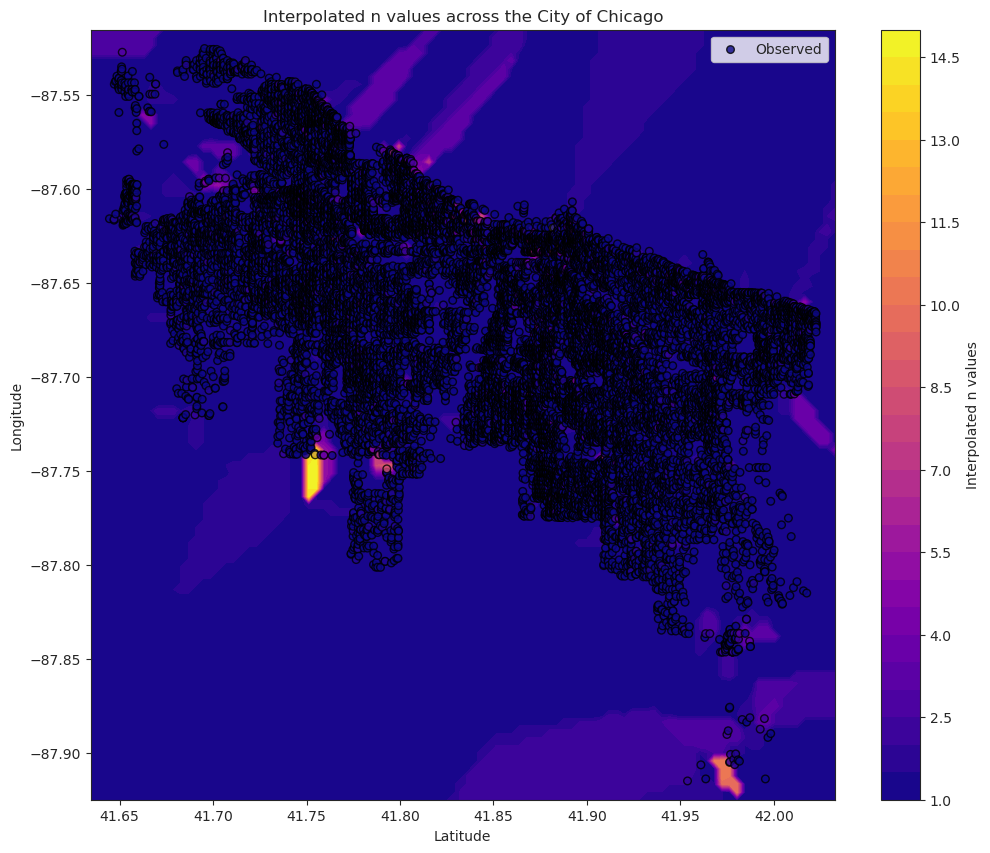

Spatial Interpolation Computation Time: 0.03 seconds


In [81]:
# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 2

# Initialize NearestNeighbors model
nn_model = KNeighborsRegressor(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations,observed_values)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")

# Extra Code

## neighbours range = 1 to 10

In [19]:
# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Define the range of n_neighbors to test
neighbors_range = range(1, 10)

# Initialize dictionary to store performance metrics for each n_neighbors value
performance_metrics = {}

for n_neighbors in neighbors_range:
    nn_model = NearestNeighbors(n_neighbors=n_neighbors)
    true_values = []
    predictions = []

    # Start timing LOOCV for the current n_neighbors
    start_time_loocv = time.time()

    # Perform LOOCV
    for loo_idx in range(observed_locations.shape[0]):
        train_idx = np.arange(observed_locations.shape[0]) != loo_idx
        test_idx = np.arange(observed_locations.shape[0]) == loo_idx
        
        train_locations = observed_locations[train_idx]
        train_values = observed_values[train_idx]
        test_location = observed_locations[test_idx].reshape(1, -1)
        test_value = observed_values[test_idx]
        
        nn_model.fit(train_locations)
        distances, indices = nn_model.kneighbors(test_location)
        predicted_value = np.mean(train_values[indices])
        
        true_values.append(test_value[0])
        predictions.append(predicted_value)

    # Calculate and store performance metrics for the current n_neighbors
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    performance_metrics[n_neighbors] = {'MAE': mae, 'RMSE': rmse}

    # End timing LOOCV
    end_time_loocv = time.time()
    print(f"n_neighbors: {n_neighbors}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Computation Time: {end_time_loocv - start_time_loocv:.2f} seconds")


n_neighbors: 1, MAE: 0.38, RMSE: 1.23, Computation Time: 255.47 seconds
n_neighbors: 2, MAE: 0.37, RMSE: 1.06, Computation Time: 256.05 seconds
n_neighbors: 3, MAE: 0.37, RMSE: 1.01, Computation Time: 254.60 seconds
n_neighbors: 4, MAE: 0.36, RMSE: 0.98, Computation Time: 262.01 seconds
n_neighbors: 5, MAE: 0.36, RMSE: 0.96, Computation Time: 256.65 seconds
n_neighbors: 6, MAE: 0.36, RMSE: 0.95, Computation Time: 269.43 seconds
n_neighbors: 7, MAE: 0.36, RMSE: 0.94, Computation Time: 262.72 seconds
n_neighbors: 8, MAE: 0.36, RMSE: 0.93, Computation Time: 264.82 seconds
n_neighbors: 9, MAE: 0.36, RMSE: 0.93, Computation Time: 227.93 seconds


## neighbours range = 160 to 1600

In [20]:
# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Define the range of n_neighbors to test
neighbors_range = range(160, 1600, 160)

# Initialize dictionary to store performance metrics for each n_neighbors value
performance_metrics = {}

for n_neighbors in neighbors_range:
    nn_model = NearestNeighbors(n_neighbors=n_neighbors)
    true_values = []
    predictions = []

    # Start timing LOOCV for the current n_neighbors
    start_time_loocv = time.time()

    # Perform LOOCV
    for loo_idx in range(observed_locations.shape[0]):
        train_idx = np.arange(observed_locations.shape[0]) != loo_idx
        test_idx = np.arange(observed_locations.shape[0]) == loo_idx
        
        train_locations = observed_locations[train_idx]
        train_values = observed_values[train_idx]
        test_location = observed_locations[test_idx].reshape(1, -1)
        test_value = observed_values[test_idx]
        
        nn_model.fit(train_locations)
        distances, indices = nn_model.kneighbors(test_location)
        predicted_value = np.mean(train_values[indices])
        
        true_values.append(test_value[0])
        predictions.append(predicted_value)

    # Calculate and store performance metrics for the current n_neighbors
    mae = mean_absolute_error(true_values, predictions)
    rmse = np.sqrt(mean_squared_error(true_values, predictions))
    performance_metrics[n_neighbors] = {'MAE': mae, 'RMSE': rmse}

    # End timing LOOCV
    end_time_loocv = time.time()
    print(f"n_neighbors: {n_neighbors}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, Computation Time: {end_time_loocv - start_time_loocv:.2f} seconds")


n_neighbors: 160, MAE: 0.36, RMSE: 0.89, Computation Time: 194.59 seconds
n_neighbors: 320, MAE: 0.36, RMSE: 0.89, Computation Time: 198.88 seconds
n_neighbors: 480, MAE: 0.36, RMSE: 0.89, Computation Time: 198.42 seconds
n_neighbors: 640, MAE: 0.37, RMSE: 0.90, Computation Time: 198.58 seconds
n_neighbors: 800, MAE: 0.37, RMSE: 0.90, Computation Time: 200.36 seconds
n_neighbors: 960, MAE: 0.37, RMSE: 0.90, Computation Time: 197.05 seconds
n_neighbors: 1120, MAE: 0.37, RMSE: 0.90, Computation Time: 199.29 seconds
n_neighbors: 1280, MAE: 0.37, RMSE: 0.90, Computation Time: 199.46 seconds
n_neighbors: 1440, MAE: 0.37, RMSE: 0.90, Computation Time: 198.13 seconds


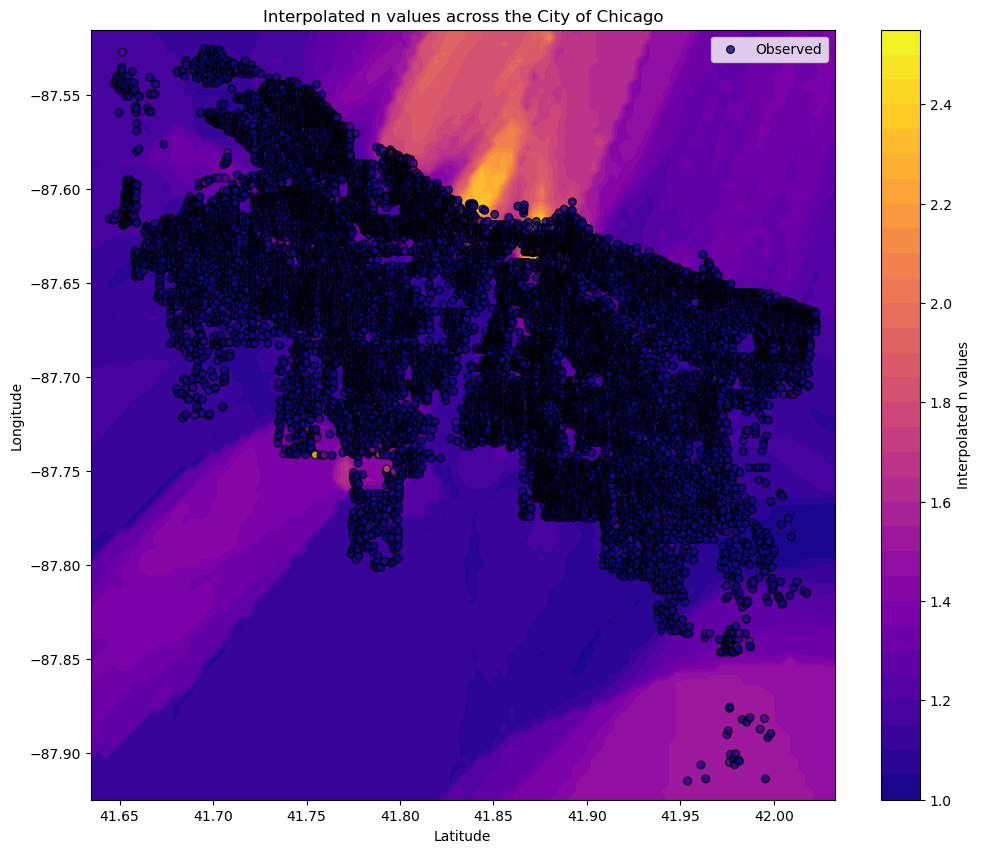

Spatial Interpolation Computation Time: 0.30 seconds


In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

# Assuming 'crimes_df' is your DataFrame containing the data

# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


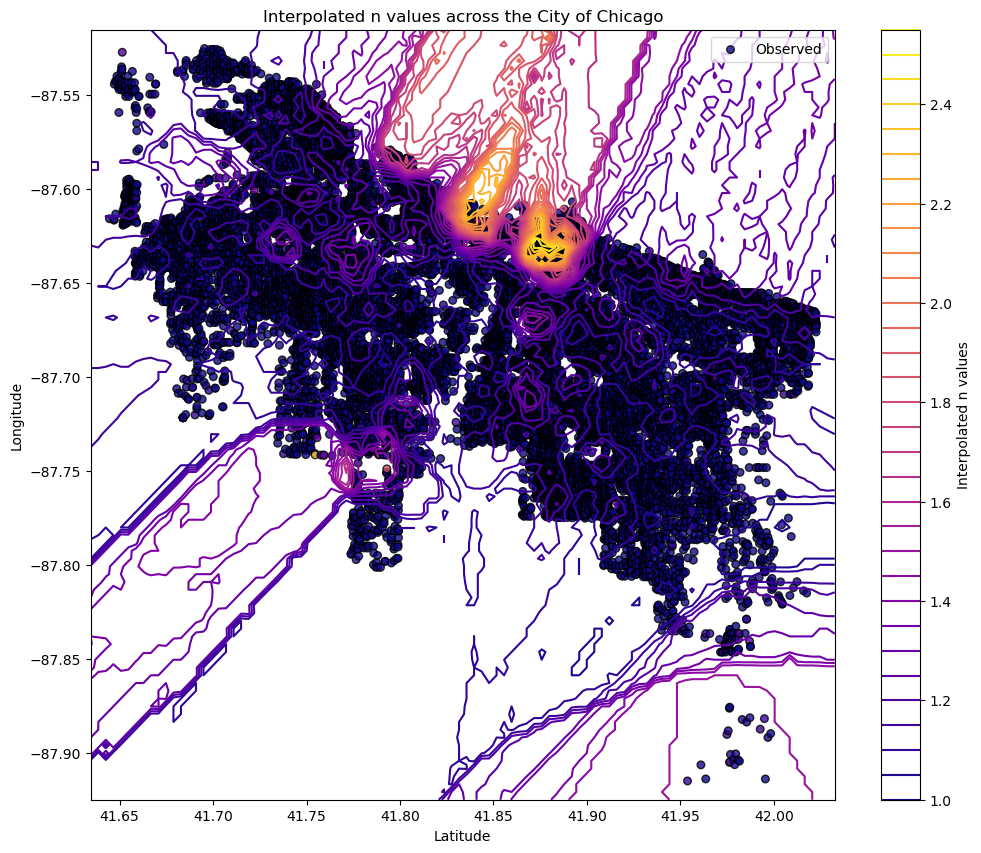

Spatial Interpolation Computation Time: 0.32 seconds


In [71]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

# Assuming 'crimes_df' is your DataFrame containing the data

# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contour(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


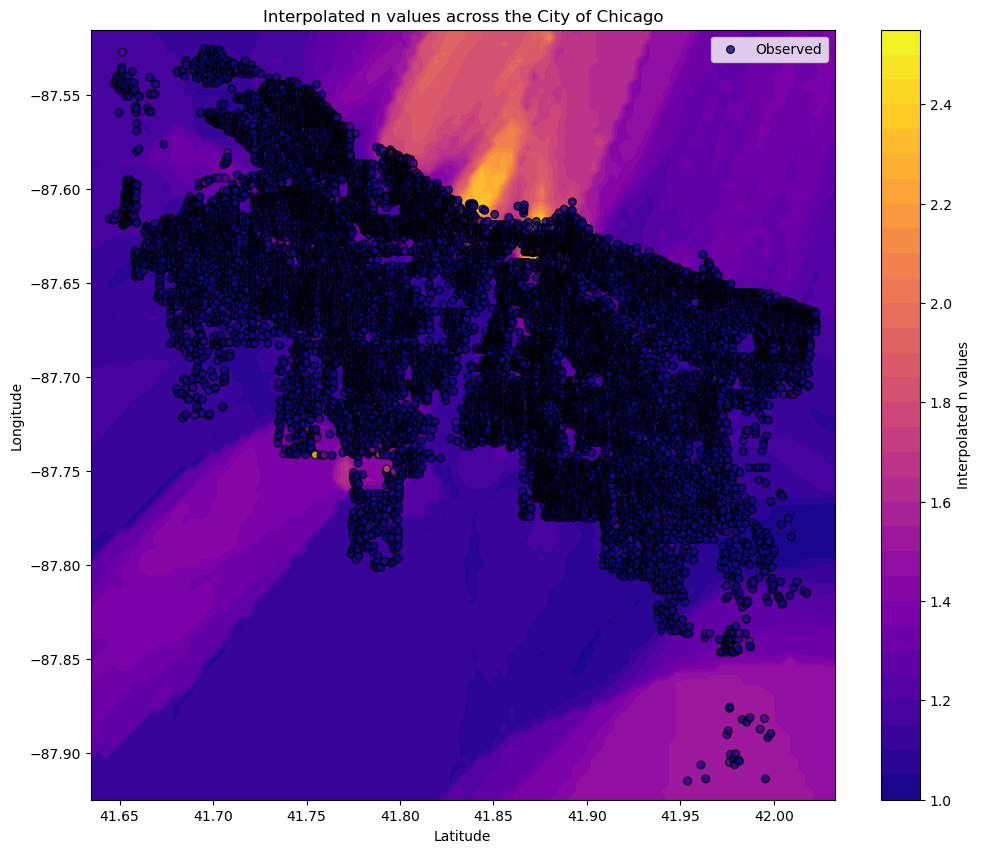

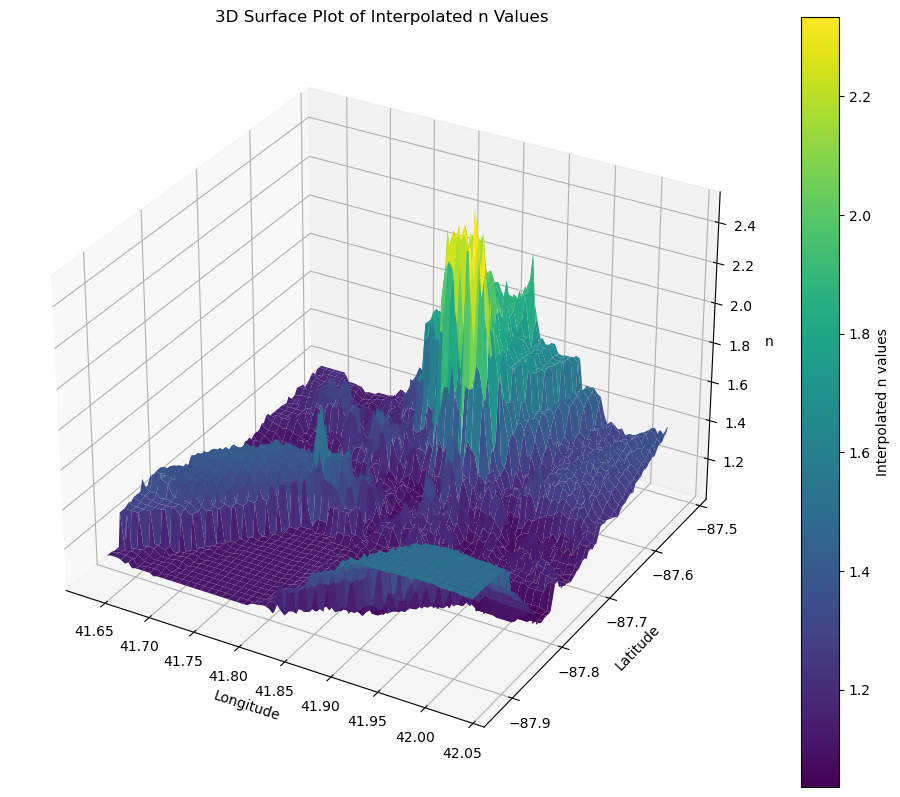

Spatial Interpolation Computation Time: 0.30 seconds


In [69]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

# Assuming 'crimes_df' is your DataFrame containing the data

# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation


fig = plt.figure(figsize=(12, 10))

from mpl_toolkits.mplot3d import Axes3D

plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Interpolated n values across the City of Chicago')
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none')
fig.colorbar(surf, ax=ax, label='Interpolated n values')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('n')
ax.set_title('3D Surface Plot of Interpolated n Values')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


## Different ways to visualize spatila distribution of original observations

### Hexbin Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


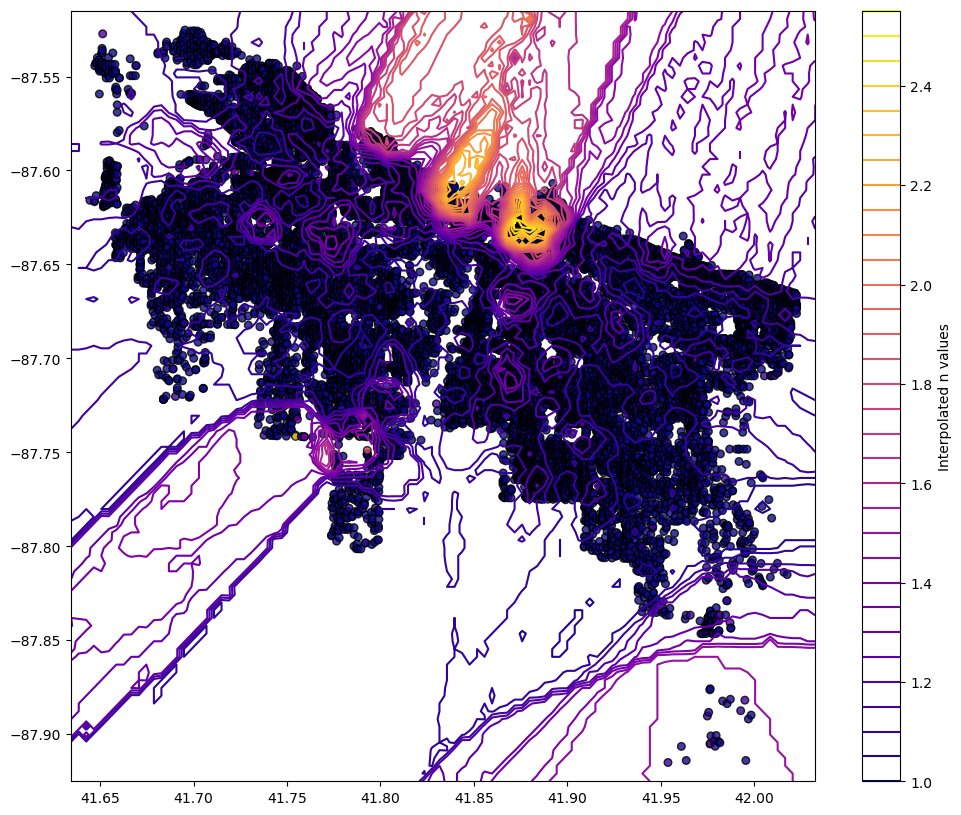

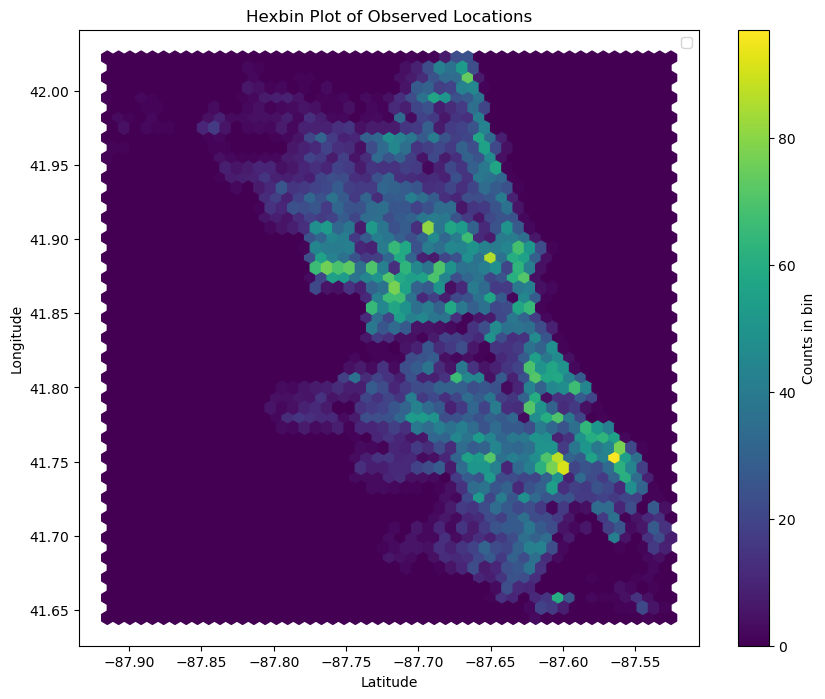

Spatial Interpolation Computation Time: 0.29 seconds


In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import NearestNeighbors
import time

# Assuming 'crimes_df' is your DataFrame containing the data

# Convert columns to numpy arrays
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contour(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')
plt.scatter(crimes_df['Latitude'],crimes_df['Longitude'], c=crimes_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.figure(figsize=(10, 8))
hb = plt.hexbin(crimes_df['Longitude'], crimes_df['Latitude'], gridsize=50, cmap='viridis')
plt.colorbar(hb, label='Counts in bin')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.title('Hexbin Plot of Observed Locations')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


## Downsampling

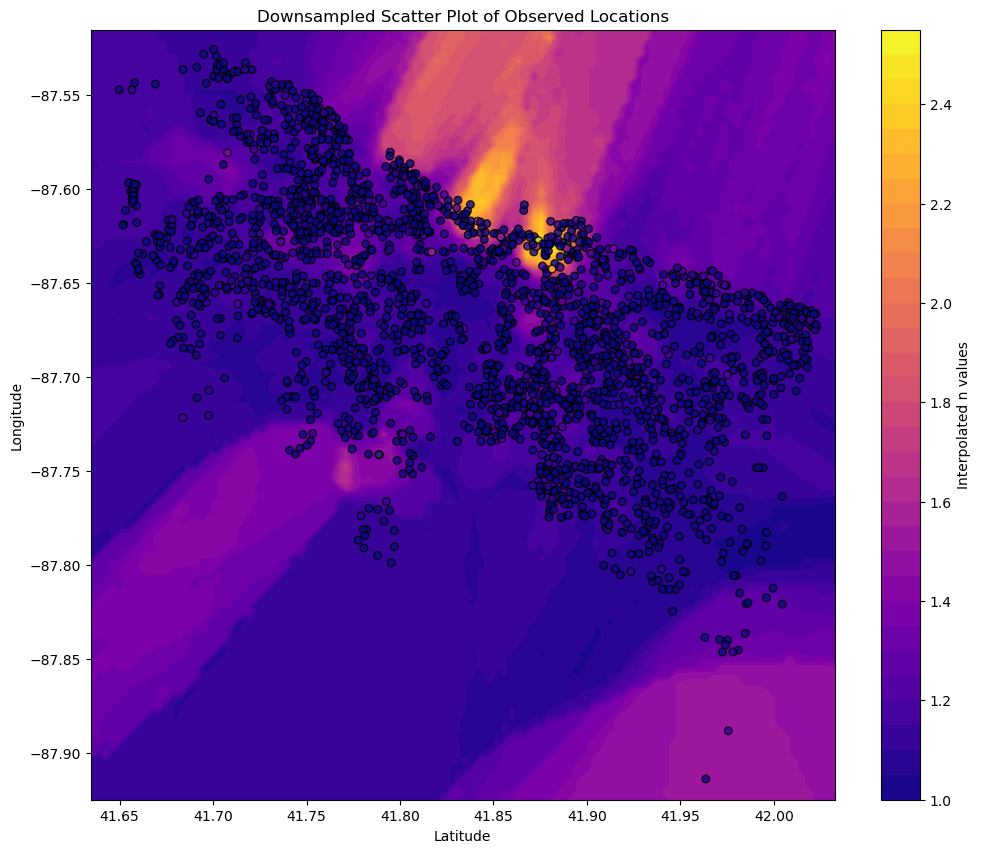

Spatial Interpolation Computation Time: 0.31 seconds


In [85]:
observed_location_columns = ['Latitude', 'Longitude']
observed_values_column = 'n'
observed_locations = crimes_df[observed_location_columns].values
observed_values = crimes_df[observed_values_column].values

# Number of nearest neighbors to consider
n_neighbors = 160

# Initialize NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=n_neighbors)

# Start timing spatial interpolation
start_time_interpolation = time.time()

# Perform spatial interpolation over the entire dataset for visualization
nn_model.fit(observed_locations)  # Re-fit model using all data

# Adjust the zoom by reducing the buffer around the min and max values
buffer = 0.01  # Smaller buffer to zoom in closer
x_min, x_max = observed_locations[:, 0].min() - buffer, observed_locations[:, 0].max() + buffer
y_min, y_max = observed_locations[:, 1].min() - buffer, observed_locations[:, 1].max() + buffer

x_range = np.linspace(x_min, x_max, 100)
y_range = np.linspace(y_min, y_max, 100)
x_grid, y_grid = np.meshgrid(x_range, y_range)
grid_points = np.c_[x_grid.ravel(), y_grid.ravel()]

# Find nearest neighbors for the grid points
distances, indices = nn_model.kneighbors(grid_points)

# Interpolate values
interpolated_values = np.mean(observed_values[indices], axis=1)
z_grid = interpolated_values.reshape(x_grid.shape)

end_time_interpolation = time.time()  # End timing spatial interpolation

# Visualization
plt.figure(figsize=(12, 10))  # Adjusted figure size for standard display
plt.contourf(x_grid, y_grid, z_grid, cmap='plasma', levels=30)
plt.colorbar(label='Interpolated n values')

# Example of downsampling without specific implementation
sampled_df = crimes_df.sample(frac=0.10)  # Adjust fraction based on dataset size
plt.scatter(sampled_df['Latitude'],sampled_df['Longitude'], c=sampled_df['n'], cmap='plasma', edgecolor='k', label='Observed', marker='o', s=30, alpha=0.8)

plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Downsampled Scatter Plot of Observed Locations')
plt.show()

print(f"Spatial Interpolation Computation Time: {end_time_interpolation - start_time_interpolation:.2f} seconds")


## Dynamic Interactive Plot

In [89]:
import plotly.express as px

# Assuming crimes_df contains latitude and longitude columns for data points in Chicago
fig = px.scatter_geo(crimes_df,
                     lat='Latitude',
                     lon='Longitude',
                     title='Interactive Map of Observed Locations in Chicago',
                     scope='usa',  # Scope to the USA
                     center={'lat': 41.8781, 'lon': -87.6298})  # Center on Chicago coordinates

fig.update_geos(
    projection_scale=9,  # This scale value zooms in on Chicago, adjust as needed
    center={'lat': 41.8781, 'lon': -87.6298},  # Center the map on Chicago
)

fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    geo=dict(
        scope='usa',
        showland=True,
        landcolor="rgb(217, 217, 217)",
        subunitwidth=1,
        countrywidth=1,
        subunitcolor="rgb(255, 255, 255)",
        countrycolor="rgb(255, 255, 255)"
    )
)

fig.show()


## Density Estimation Plots

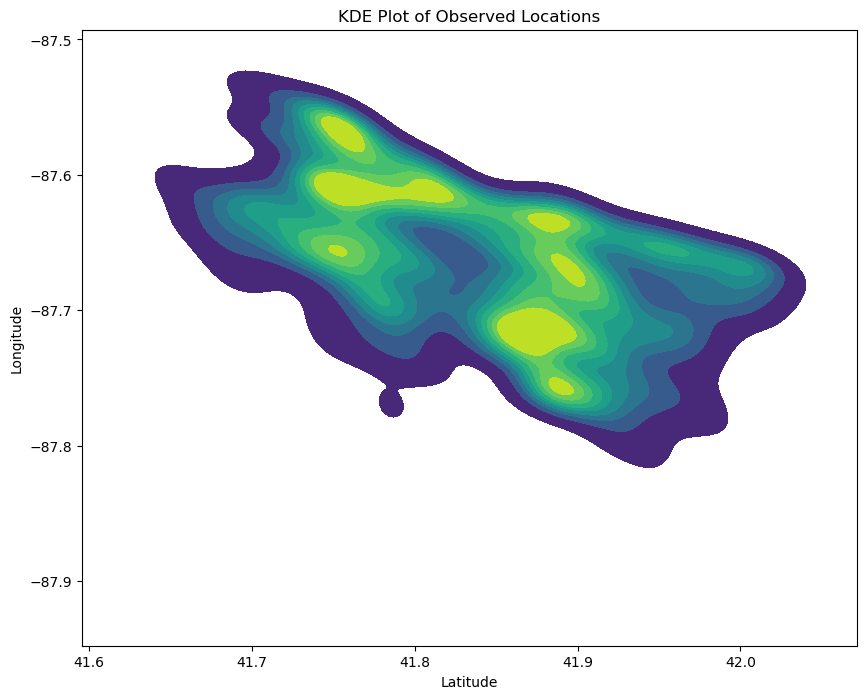

In [94]:
# Assuming you have seaborn installed
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.kdeplot(data=crimes_df, x='Latitude', y='Longitude', fill=True, cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('KDE Plot of Observed Locations')
plt.show()
